In [1]:
import pandas as pd
import shap

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from baseline_package.base_predictor import BasePredictor

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
results = []

In [3]:
d_path = "dataset/preprocessed.csv"

In [4]:
rsf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=120,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=4,
    max_leaf_nodes=None,
    bootstrap=False,
    max_features='sqrt',
    min_weight_fraction_leaf=0.0,
    class_weight='balanced',
    warm_start=False,
    ccp_alpha=0.0
)

param_grid_rsf = {
    'criterion' : ['entropy','log_loss'],
    'n_estimators' : [50,100,120,150],
    'max_depth' : [None],
    'min_samples_split' : [4,5,6],
    'min_samples_leaf' : [2,3,4],
    'max_leaf_nodes' : [None],
    'bootstrap' : [False],
    'max_features' : ['sqrt','log2'],
    'min_weight_fraction_leaf' : [0.0],
    'class_weight' : [{0:1, 1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.005,0.01]
}

bp_rsf = BasePredictor(model = rsf, d_path = d_path, target = 'mortality_30_days', param_grid = param_grid_rsf, n_splits = 5)
bp_rsf.run(features = None, select_path = None)

X has feature names, but RandomForestClassifier was fitted without feature names


In [5]:
bp_rsf.best_params

{'bootstrap': False,
 'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'warm_start': False}

In [6]:
bp_rsf.sens_re

[61.76470588235294,
 73.52941176470588,
 65.71428571428571,
 54.285714285714285,
 62.857142857142854]

In [7]:
bp_rsf.specs_re

[81.9327731092437,
 79.41176470588235,
 72.57383966244726,
 81.85654008438819,
 80.59071729957806]

In [8]:
bp_rsf.confs_re

[array([[195,  43],
        [ 13,  21]]),
 array([[189,  49],
        [  9,  25]]),
 array([[172,  65],
        [ 12,  23]]),
 array([[194,  43],
        [ 16,  19]]),
 array([[191,  46],
        [ 13,  22]])]

In [9]:
bp_rsf.best_params

{'bootstrap': False,
 'ccp_alpha': 0.01,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'warm_start': False}

In [10]:
bp_rsf.f1s_re

[0.8187059577194107,
 0.8164712878015631,
 0.7600832262688981,
 0.806725959601304,
 0.8097204901378028]

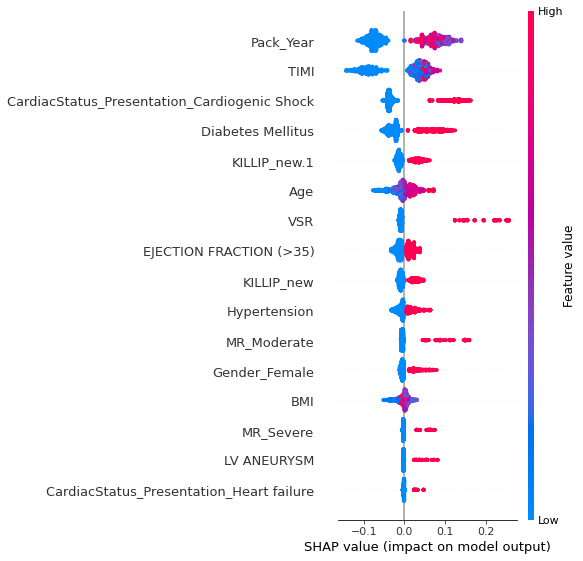

In [11]:
rsf_shap_re = shap.TreeExplainer(bp_rsf.model)
shap_vals = rsf_shap_re.shap_values(bp_rsf.data_re['X'])

shap.summary_plot(shap_vals[1],bp_rsf.data_re['X'].astype('float64'))

In [12]:
bp_rsf.sens_un

[59.45945945945946]

In [13]:
bp_rsf.specs_un

[76.23762376237624]

In [14]:
bp_rsf.f1s_un

[0.7865031984511988]

In [15]:
bp_rsf.confs_un

[array([[231,  72],
        [ 15,  22]])]

In [16]:
log_r = LogisticRegression()

param_grid_logr = {
    'penalty' : ['l2'],
    'dual' : [False],
    'tol' : [1e-3,1e-4],
    'C' : [0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2],
    'fit_intercept' : [True],
    'class_weight' : [{0:1, 1:5},{0:1,1:2},{0:1, 1:42},'balanced','balanced_subsample'],
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [5000,1000],
    'warm_start' : [False],
    'n_jobs' : [None],
    'multi_class' : ['auto'],
    'l1_ratio' : [None],
}

bp_logr = BasePredictor(model = log_r, d_path = d_path, target = 'mortality_30_days', param_grid = param_grid_logr, n_splits = 5)
bp_logr.run(features = None, select_path = None)


520 fits failed out of a total of 2600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/Library/Frameworks/Pyth

In [17]:
bp_logr.best_params

{'C': 0.8,
 'class_weight': {0: 1, 1: 5},
 'dual': False,
 'fit_intercept': True,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 0.001,
 'warm_start': False}

In [18]:
bp_logr.sens_re

[58.82352941176471,
 61.76470588235294,
 54.285714285714285,
 60.0,
 54.285714285714285]

In [19]:
bp_logr.specs_re

[91.59663865546219,
 89.07563025210085,
 82.27848101265823,
 85.23206751054853,
 85.23206751054853]

In [20]:
bp_logr.f1s_re

[0.879269695227142,
 0.8661107111431086,
 0.80945268732493,
 0.836463546192802,
 0.828599209778985]

In [21]:
bp_logr.confs_re

[array([[218,  20],
        [ 14,  20]]),
 array([[212,  26],
        [ 13,  21]]),
 array([[195,  42],
        [ 16,  19]]),
 array([[202,  35],
        [ 14,  21]]),
 array([[202,  35],
        [ 16,  19]])]

In [22]:
bp_logr.sens_un

[54.054054054054056]

In [23]:
bp_logr.specs_un

[86.79867986798679]

In [24]:
bp_logr.f1s_un

[0.8489216917160668]

In [25]:
bp_logr.confs_un

[array([[263,  40],
        [ 17,  20]])]

In [40]:
etc = ExtraTreesClassifier(
    criterion='entropy',
    bootstrap=False,
    class_weight='balanced',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    random_state=0,
    warm_start=False
)

param_grid_etc = {
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [None],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3],
    'min_weight_fraction_leaf' : [0.0],
    'max_features' : ['sqrt','log2'],
    'max_leaf_nodes' : [None],
    'min_impurity_decrease' : [0.0],
    'bootstrap' : [True, False],
    'class_weight' : [{0:1,1:1},{0:1,1:2},{0:1,1:5},'balanced'],
    'warm_start' : [False],
    'ccp_alpha' : [0.0,0.005],
    'random_state' : [0]
}

bp_etc = BasePredictor(model = etc, d_path = d_path, target =  'mortality_30_days', param_grid = param_grid_etc, n_splits = 5)
bp_etc.run(features = None, select_path = None)

X has feature names, but ExtraTreesClassifier was fitted without feature names


In [41]:
bp_etc.best_params

{'bootstrap': False,
 'ccp_alpha': 0.005,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'warm_start': False}

In [42]:
bp_etc.sens_re

[67.64705882352942,
 52.94117647058824,
 60.0,
 62.857142857142854,
 57.14285714285714]

In [43]:
bp_etc.specs_re

[88.65546218487394,
 84.45378151260505,
 80.59071729957806,
 83.12236286919831,
 83.54430379746836]

In [44]:
bp_etc.f1s_re

[0.8711697722567289,
 0.8236387208297321,
 0.8060287463401652,
 0.8263809467604935,
 0.8215206508135169]

In [45]:
bp_etc.confs_re

[array([[211,  27],
        [ 11,  23]]),
 array([[201,  37],
        [ 16,  18]]),
 array([[191,  46],
        [ 14,  21]]),
 array([[197,  40],
        [ 13,  22]]),
 array([[198,  39],
        [ 15,  20]])]

In [46]:
bp_etc.sens_un

[62.16216216216216]

In [47]:
bp_etc.specs_un

[83.4983498349835]

In [48]:
bp_etc.f1s_un

[0.8366225724739658]

In [49]:
bp_etc.confs_un

[array([[253,  50],
        [ 14,  23]])]

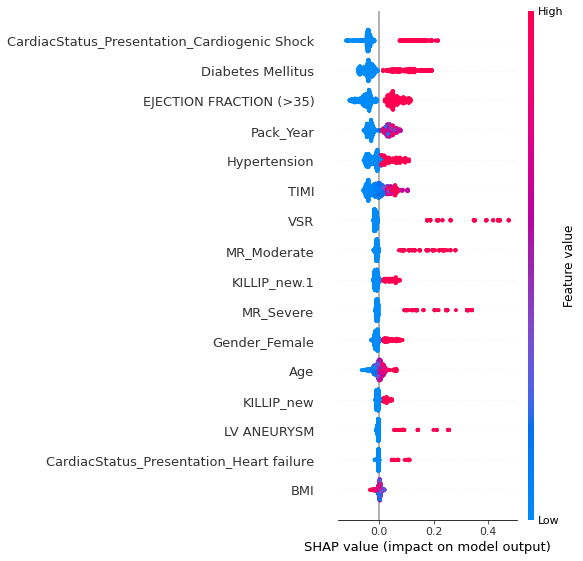

In [50]:
etc_shap_re = shap.TreeExplainer(bp_etc.model)
shap_vals = etc_shap_re.shap_values(bp_etc.data_re['X'])

shap.summary_plot(shap_vals[1],bp_etc.data_re['X'].astype('float64'))

In [51]:
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']==0].shape)
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']==1].shape)
print(bp_etc.data_re['Y'][bp_etc.data_re['Y']<=1].shape)

(1000,)
(1000,)
(2000,)


In [52]:
results = []

In [53]:
results.append(["RSF", sum(bp_rsf.sens)/5, sum(bp_rsf.specs)/5, sum(bp_rsf.f1s)/5, None,
                sum(bp_rsf_resampled.sens)/5, sum(bp_rsf_resampled.specs)/5, sum(bp_rsf_resampled.f1s)/5])

AttributeError: 'BasePredictor' object has no attribute 'sens'

In [ ]:
results.append(["ExtraTree", sum(bp_etc.sens)/5, sum(bp_etc.specs)/5, sum(bp_etc.f1s)/5, None,
                sum(bp_etc_resampled.sens)/5, sum(bp_etc_resampled.specs)/5, sum(bp_etc_resampled.f1s)/5])

In [ ]:
results.append(["LogitR", sum(bp_logr.sens)/5, sum(bp_logr.specs)/5, sum(bp_logr.f1s)/5, None,
                sum(bp_logr_resampled.sens)/5, sum(bp_logr_resampled.specs)/5, sum(bp_logr_resampled.f1s)/5])

In [ ]:
df_results = pd.DataFrame(data=results,
            columns=["Model", "Sensitivity","Specificity","F1-score", None, "Sensitivity (w/ resampling)","Specificity (w/ resampling)","F1-Score (w/ resampling)"])

In [ ]:
df_results.to_excel("results/traditional_model_results.xlsx")